In [278]:
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from PIL import Image, ImageDraw, ImageFont

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [279]:
#a
f = open('article.txt', 'r')
text = f.read()
f.close()

#b
words = nltk.word_tokenize(text)
print(len(words))

360


In [280]:
#c
stopwords_list = stopwords.words('english')
print(stopwords_list)
cleared_words = [ w  for w in words if w not in stopwords_list]
print(len(cleared_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [281]:
#d
print(cleared_words)
stopwords_list.extend(['.', 'the', 'yet', 'in', ',', '%', 'and'])

['Samsung', 'restricting', 'use', 'so-called', 'generative', 'artificial', 'intelligence', 'tools', 'ChatGPT', 'employees', 'company', 'discovered', 'services', 'misused', '.', 'The', 'South', 'Korean', 'technology', 'giant', 'confirmed', 'CNBC', 'Tuesday', 'temporarily', 'restricting', 'use', 'generative', 'AI', 'companyâ€™s', 'personal', 'computers', '.', 'Employees', 'one', 'Samsungâ€™s', 'biggest', 'divisions', 'informed', 'move', 'memo', 'end', 'April', 'cases', 'misuse', 'technology', '.', 'Bloomberg', 'reported', 'Tuesday', 'staff', 'uploaded', 'sensitive', 'code', 'ChatGPT', '.', 'ChatGPT', 'viral', 'AI', 'chatbot', 'trained', 'huge', 'amounts', 'data', 'able', 'generate', 'response', 'user', 'queries', '.', 'It', 'form', 'so-called', 'generative', 'AI', '.', 'Samsung', 'generative', 'AI', 'product', 'yet', '.', 'ChatGPT', 'developed', 'U.S.', 'firm', 'OpenAI', 'backed', 'Microsoft', 'generative', 'AI', 'products', 'include', 'Googleâ€™s', 'Bard', '.', 'Inputting', 'sensitive',

In [282]:
cleared_words = [ w  for w in words if w not in stopwords_list]
print(len(cleared_words))

207


In [283]:
#e
lemmanizer = WordNetLemmatizer()
lemmanized_words = [lemmanizer.lemmatize(w) for w in cleared_words]
print(len(lemmanized_words))

207


In [284]:
#f
dictionary = {}
for w in lemmanized_words:
    if w in dictionary:
        dictionary[w] += 1
    else:
        dictionary[w] = 1

list_of_tuples = [(k, v) for k, v in dictionary.items()]
list_of_tuples.sort(key=lambda tup: tup[1], reverse=True)
print(list_of_tuples)

[('generative', 9), ('AI', 9), ('ChatGPT', 8), ('Samsung', 6), ('company', 5), ('use', 4), ('employee', 4), ('service', 4), ('code', 4), ('restricting', 3), ('technology', 3), ('generate', 3), ('product', 3), ('could', 3), ('information', 3), ('using', 3), ('so-called', 2), ('Tuesday', 2), ('personal', 2), ('computer', 2), ('staff', 2), ('sensitive', 2), ('data', 2), ('U.S.', 2), ('concern', 2), ('reportedly', 2), ('year', 2), ('way', 2), ('used', 2), ('help', 2), ('artificial', 1), ('intelligence', 1), ('tool', 1), ('discovered', 1), ('misused', 1), ('The', 1), ('South', 1), ('Korean', 1), ('giant', 1), ('confirmed', 1), ('CNBC', 1), ('temporarily', 1), ('companyâ€™s', 1), ('Employees', 1), ('one', 1), ('Samsungâ€™s', 1), ('biggest', 1), ('division', 1), ('informed', 1), ('move', 1), ('memo', 1), ('end', 1), ('April', 1), ('case', 1), ('misuse', 1), ('Bloomberg', 1), ('reported', 1), ('uploaded', 1), ('viral', 1), ('chatbot', 1), ('trained', 1), ('huge', 1), ('amount', 1), ('able', 1)

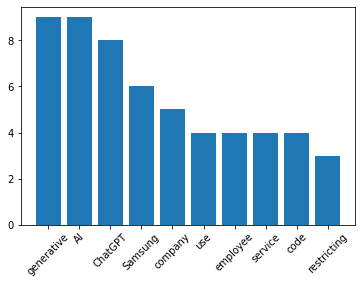

In [285]:
top_10 = list_of_tuples[:10]

plt.bar([t[0] for t in top_10], [t[1] for t in top_10])
plt.xticks(rotation=45)
plt.show()

In [286]:
#g
wordcloud = WordCloud().generate(" ".join(lemmanized_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'